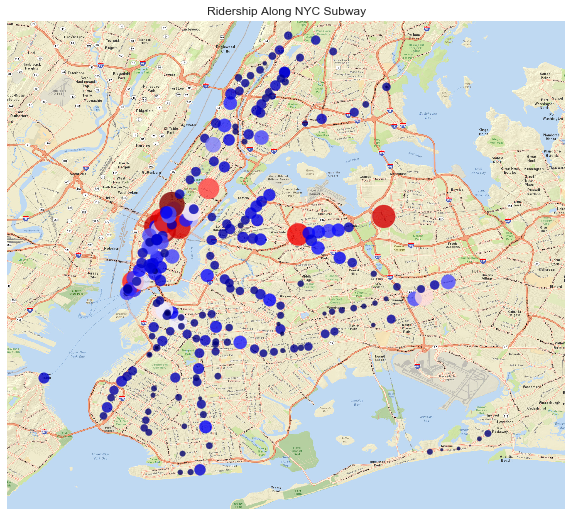

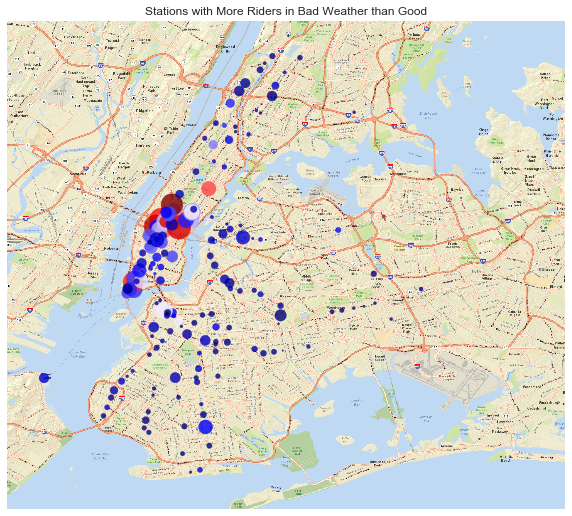

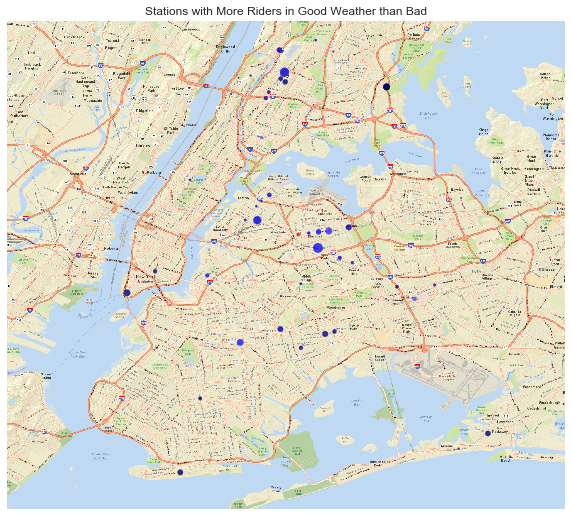

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from mpl_toolkits.basemap import Basemap

#read data
filename = 'nyc_subway_weather.csv'
subway_df = pd.read_csv(filename)

# group data by location and weather
dataPerUnit = subway_df.groupby('UNIT')
dataPerUnitRain = subway_df.loc[subway_df['rain'] == True].groupby('UNIT')
dataPerUnitNoRain = subway_df.loc[subway_df['rain'] == False].groupby('UNIT')

# select useable data to use
lat = dataPerUnit['latitude'].first()
lon = dataPerUnit['longitude'].first()
entries = dataPerUnit['ENTRIESn_hourly'].mean()
entries_rain = dataPerUnitRain['ENTRIESn_hourly'].mean()
entries_no_rain = dataPerUnitNoRain['ENTRIESn_hourly'].mean()

# plot maps using Basemap package
epsg = 4269
xpixels = 2000
figsize = (10,10)

def plot_map(map_name, title, s, cmap):
    plt.figure(figsize = figsize) # size of map
    m = Basemap(llcrnrlon=-74.1 ,llcrnrlat=40.55,
        urcrnrlon=-73.7 ,urcrnrlat=40.90, resolution = 'h', epsg = epsg)
    m.arcgisimage(service=map_name, xpixels = xpixels)
    ## add scatter here, using data selected above
    m.scatter(lon, lat, s = s, alpha = .8, c = entries, cmap = cmap)
    plt.title(title)
    
plot_map('ESRI_StreetMap_World_2D', 'Ridership Along NYC Subway', entries / 16, 'seismic')
plt.show()

plot_map('ESRI_StreetMap_World_2D', 'Stations with More Riders in Bad Weather than Good', (entries_rain - entries_no_rain)/3, 'seismic')
plt.show()

plot_map('ESRI_StreetMap_World_2D', 'Stations with More Riders in Good Weather than Bad', (entries_no_rain - entries_rain)/3, 'seismic')
plt.show()

## I decided to look at the subway ridership density in general and based on weather conditions (rain / no rain).
## From this, we can see that subway usage is much higher downtown than anywhere else.
## When I started I assumed that, in bad weather, NYC citizens would be more likely to use the subway to avoid
## the bad weather. This map, which records the rider density in bad weather supports that theory.
## Interestingly, when we flip the data, we see that those subway users coming in from far away prefer good 
## weather to travel in. This might be because commuting in general drops in bad weather.